In [129]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#import pandas_profiling
%matplotlib inline

In [130]:
df_rough=pd.read_csv(r'C:\Users\lizac\Documents\Womens Clothing E-Commerce Reviews.csv')

In [131]:
column_contain=['Clothing ID','Age','Review Text','Rating','Recommended IND','Positive Feedback Count','Department Name']

In [132]:
df=pd.DataFrame(data=df_rough,columns=column_contain)

In [133]:
df=df.dropna(axis=0).reset_index()

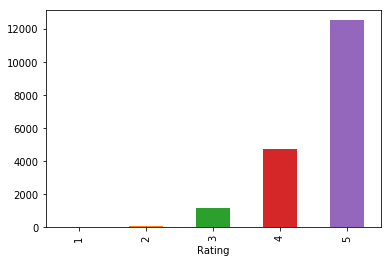

In [134]:
positive_ind=df[df['Recommended IND']==1]
positive_ind=positive_ind.groupby('Rating').size()
f = plt.figure()
positive_ind.plot(kind='bar')
plt.show()

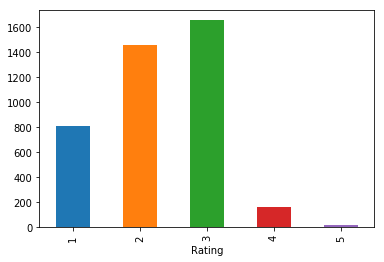

In [135]:
negative_ind=df[df['Recommended IND']==0]
negative_ind=negative_ind.groupby('Rating').size()
f = plt.figure()
negative_ind.plot(kind='bar')
plt.show()

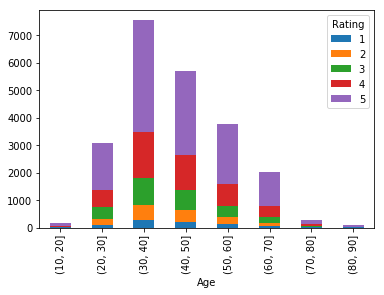

In [136]:
df.groupby(['Rating', pd.cut(df['Age'], np.arange(0,100,10))])\
       .size()\
       .unstack(0)\
       .plot.bar(stacked=True)

In [13]:
a=df.groupby(['Class Name', pd.cut(df['Age'], np.arange(0,100,10))]).size().unstack(0)

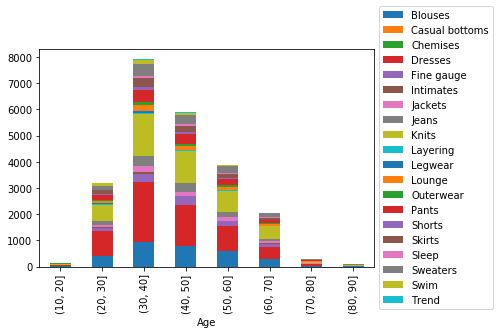

In [14]:

f = plt.figure()
a.plot(kind='bar',stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

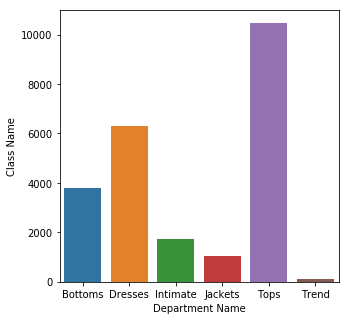

In [15]:
z=df.groupby('Department Name',as_index=False).count()

plt.figure(figsize=(5,5))
sns.barplot(x=z['Department Name'],y=z['Class Name'])


In [137]:
from collections import Counter
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
import nltk
from nltk.corpus import stopwords
from nltk import sent_tokenize, word_tokenize
from wordcloud import WordCloud, STOPWORDS
import re


In [138]:
from textblob import TextBlob

bloblist_desc = list()

df_review_str=df['Review Text'].astype(str)
for row in df_review_str:
    blob = TextBlob(row)
    bloblist_desc.append((row,blob.sentiment.polarity, blob.sentiment.subjectivity))
    df_polarity_desc = pd.DataFrame(bloblist_desc, columns = ['Review','sentiment','polarity'])
    
def f(df_polarity_desc):
    if df_polarity_desc['sentiment'] > 0:
        val = "Positive Review"
    elif df_polarity_desc['sentiment'] == 0:
        val = "Neutral Review"
    else:
        val = "Negative Review"
    return val

df_polarity_desc['Sentiment_Type'] = df_polarity_desc.apply(f, axis=1)

In [139]:
title= df_polarity_desc['Sentiment_Type'].astype(str).str.strip('[]').str.get_dummies()#
title.columns = title.columns.str.strip("")

In [140]:
title1= df['Department Name'].astype(str).str.strip('[]').str.get_dummies()#
title1.columns = title1.columns.str.strip("")

In [141]:
df=pd.concat([df,title,title1],axis=1)

In [142]:
#df=df.drop(['Department Name'], axis=1, inplace=True)d

In [143]:
column_contain=['Age', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count',
       'Negative Review', 'Neutral Review', 'Positive Review', 'Bottoms',
       'Dresses', 'Intimate', 'Jackets', 'Tops', 'Trend']

In [144]:
df=pd.DataFrame(data=df ,columns=column_contain)

In [23]:
def wc(data,bgcolor,title):
    plt.figure(figsize = (100,100))
    wc = WordCloud(background_color = bgcolor, max_words = 1000,  max_font_size = 50)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis('off')

In [24]:
positive_reviews=df_polarity_desc[df_polarity_desc['Sentiment_Type']=='Positive Review']
negative_reviews=df_polarity_desc[df_polarity_desc['Sentiment_Type']=='Negative Review']

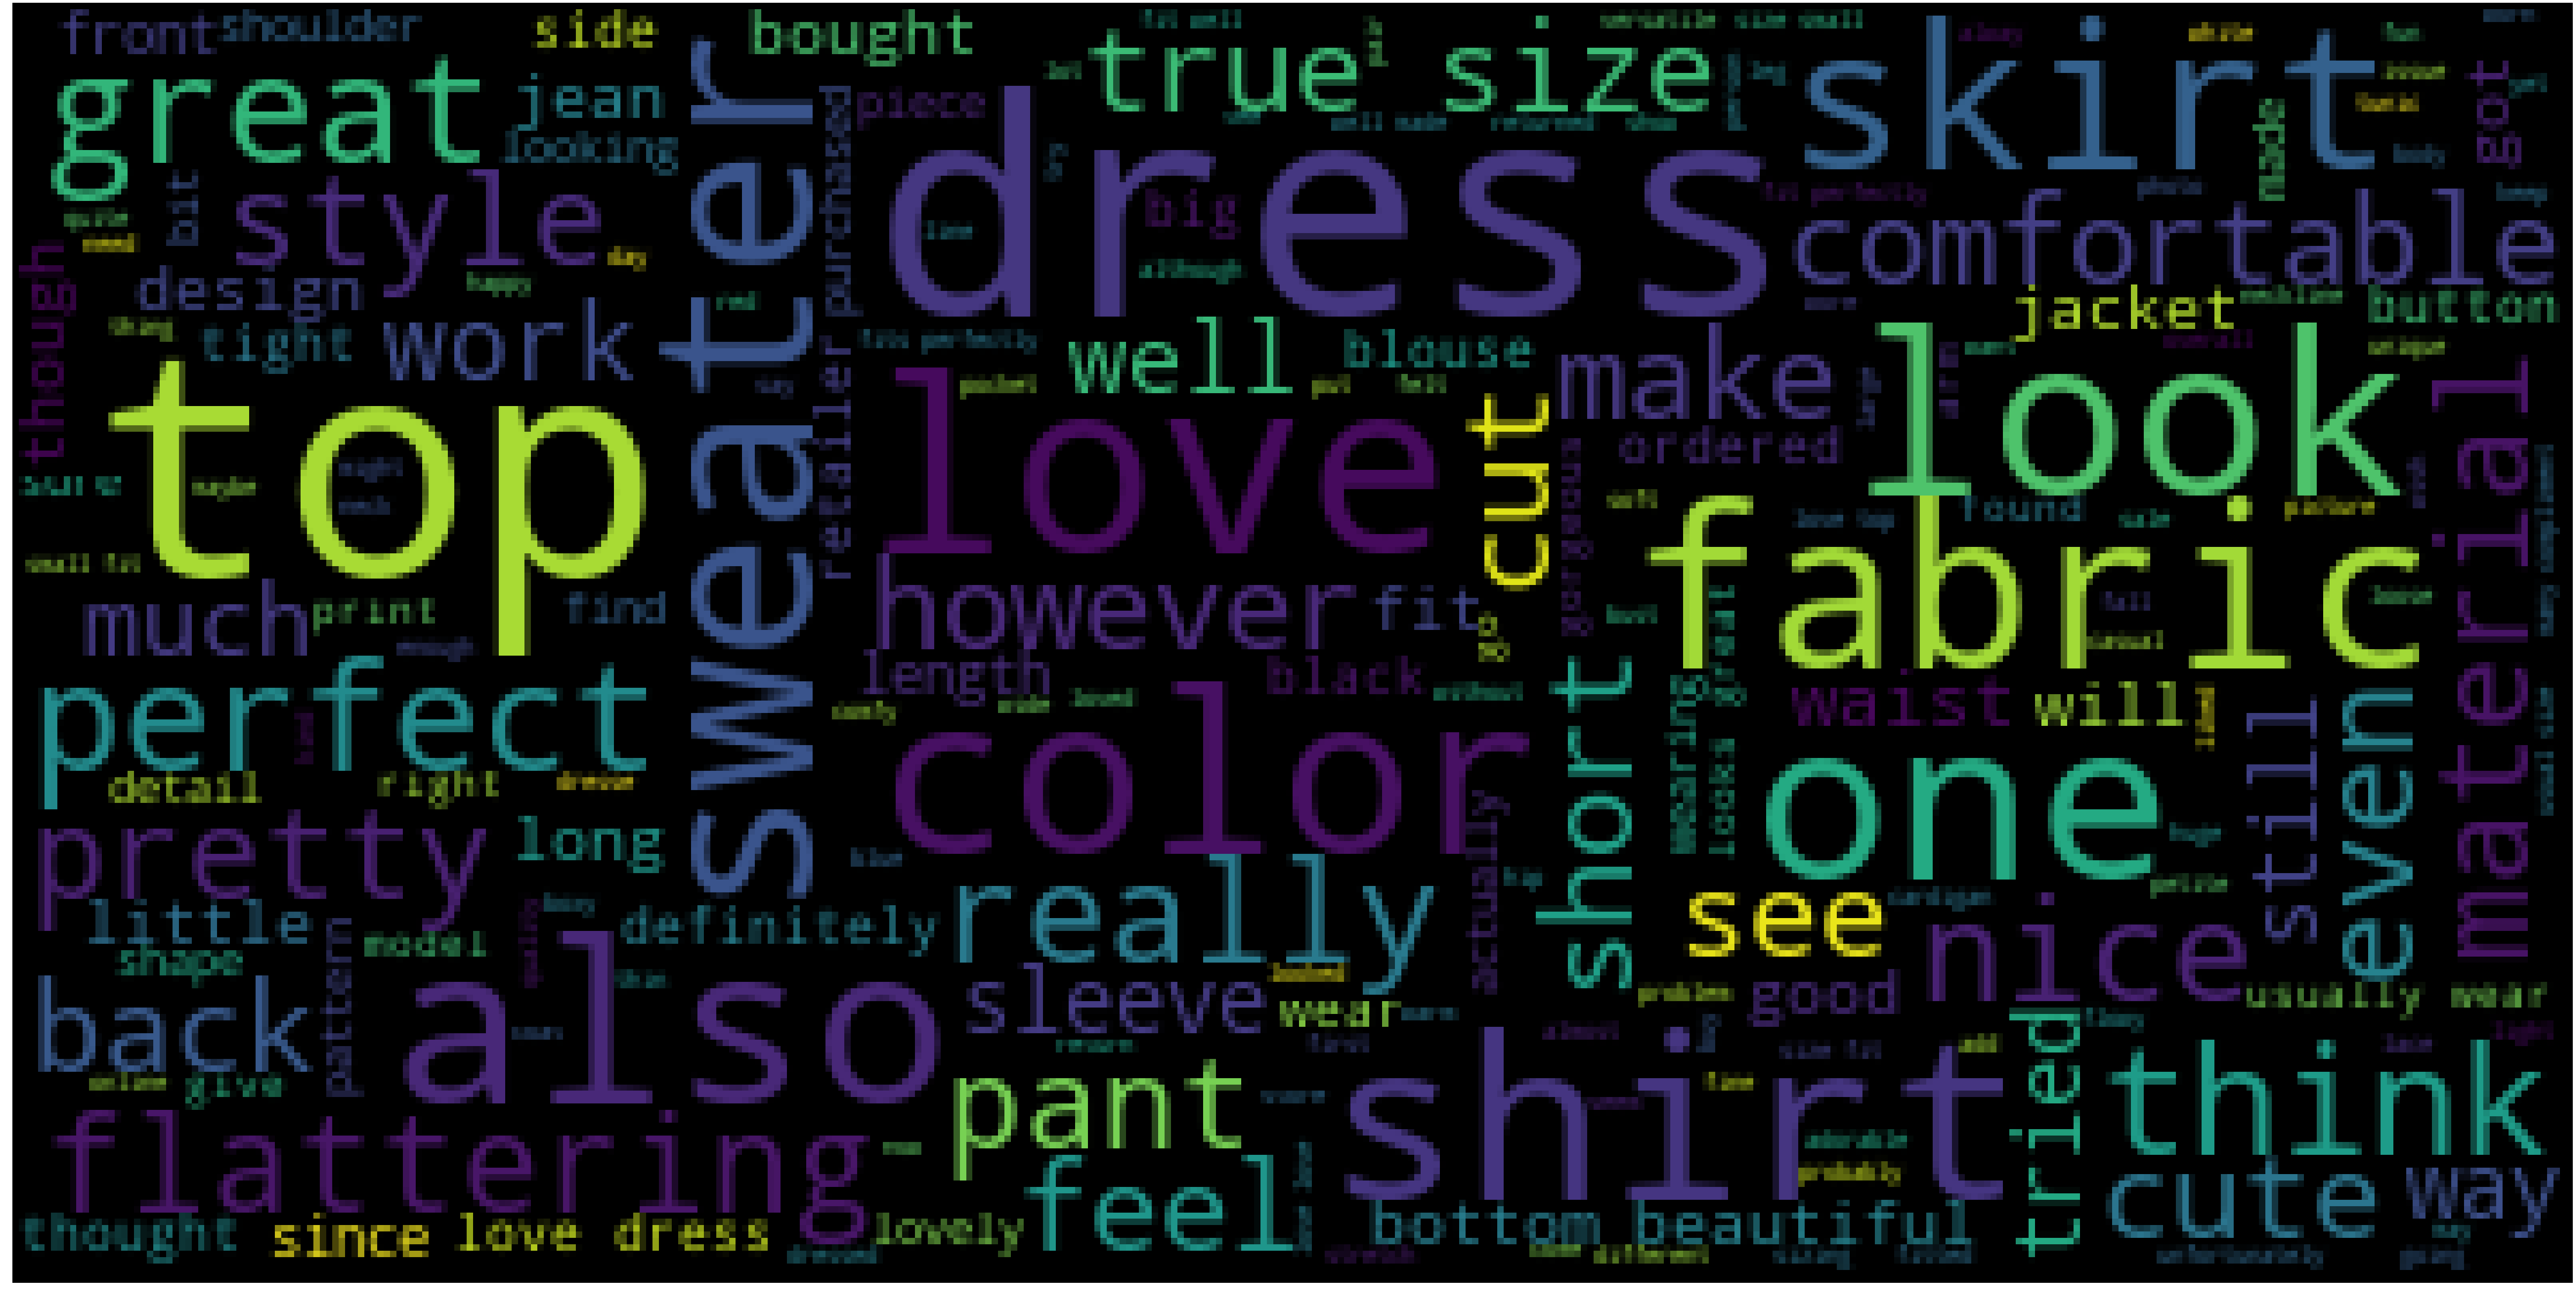

In [25]:
wc(positive_reviews['Review'],'black','Most Used Words')

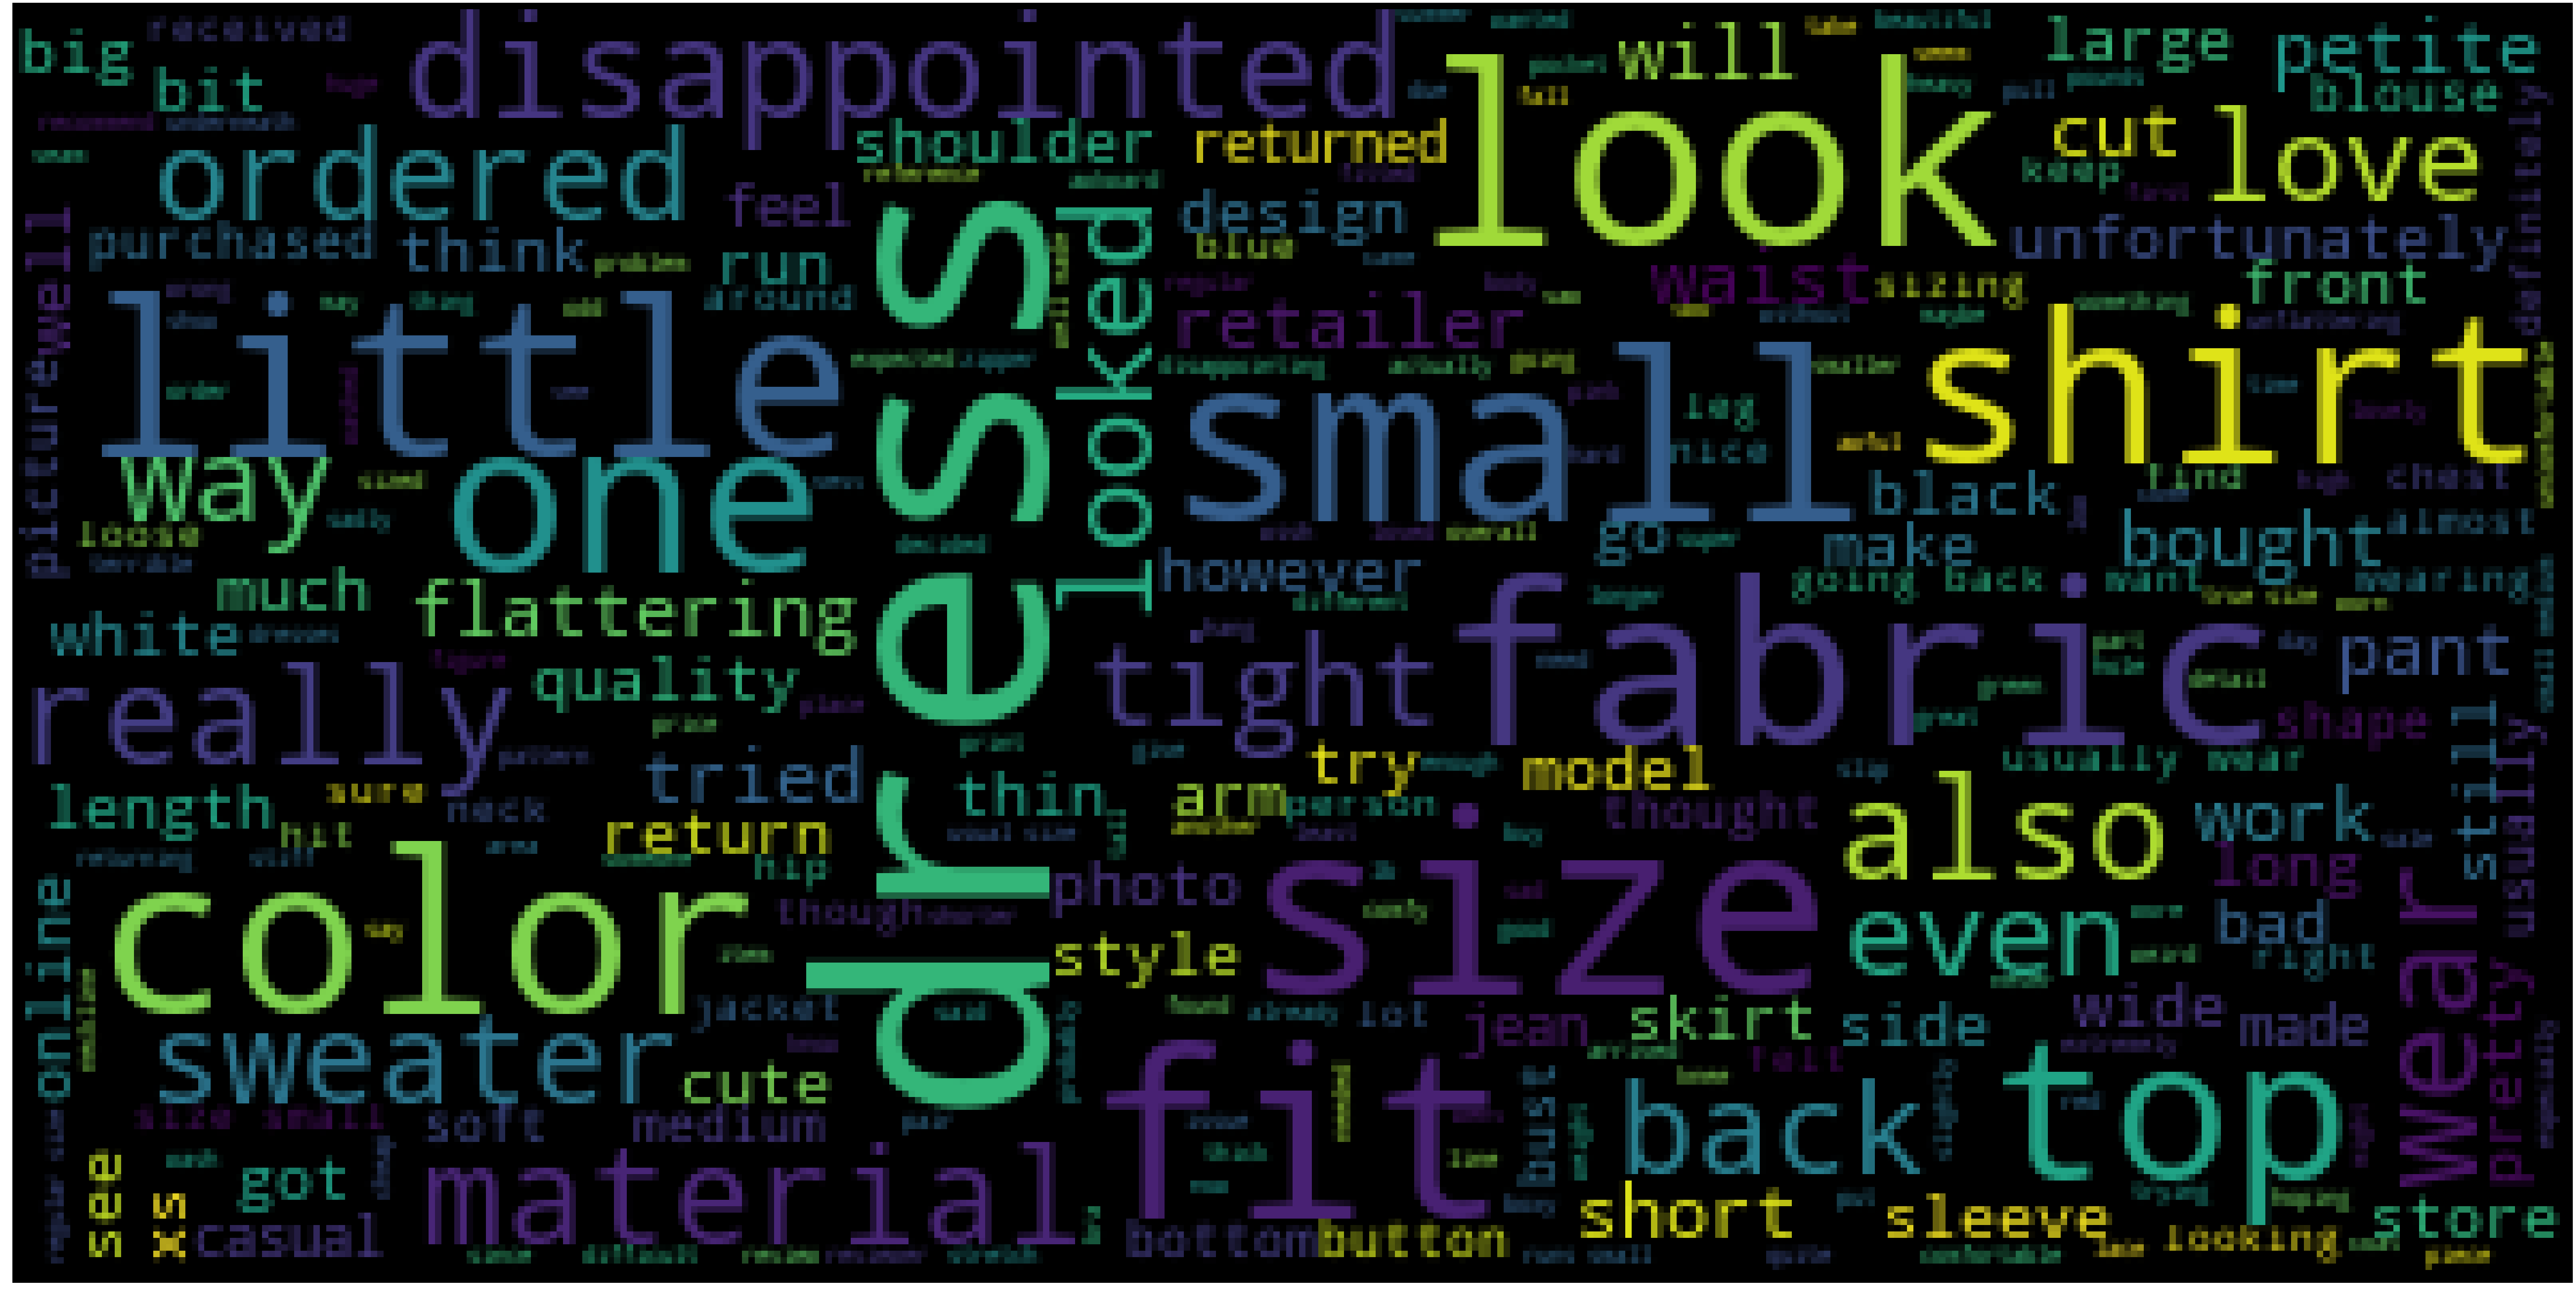

In [26]:
wc(negative_reviews['Review'],'black','Most Used Words')

In [145]:
import string
import numpy as np
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
import re
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer

from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [146]:
stops = set(stopwords.words("english"))
def cleanData(text, lowercase = False, remove_stops = False, stemming = False):
   
    text = str(text)
    text = re.sub(r'[0-9]+', '', text)
    txt = re.sub(r'[^A-Za-z0-9\s]',r'',text)
    text = re.sub(r'\n',r' ',text)
    text = re.sub(r"[^A-Za-z0-9^,!.\/'+-=]", " ", text)
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r",", " ", text)
    text = re.sub(r"\.", " ", text)
    text = re.sub(r"!", " ! ", text)
    text = re.sub(r"\/", " ", text)
    text = re.sub(r"\^", " ^ ", text)
    text = re.sub(r"\+", " + ", text)
    text = re.sub(r"\-", " - ", text)
    text = re.sub(r"\=", " = ", text)
    text = re.sub(r"'", " ", text)
    text = re.sub(r"(\d+)(k)", r"\g<1>000", text)
    text = re.sub(r":", " : ", text)
    text = re.sub(r" e g ", " eg ", text)
    text = re.sub(r" b g ", " bg ", text)
    text = re.sub(r" u s ", " american ", text)
    text = re.sub(r"\0s", "0", text)
    text = re.sub(r" 9 11 ", "911", text)
    text = re.sub(r"e - mail", "email", text)
    text = re.sub(r"j k", "jk", text)
    text = re.sub(r"\s{2,}", " ", text)
    
    
    if lowercase:
        text = " ".join([w.lower() for w in text.split()])
        
    if remove_stops:
        text = " ".join([w for w in text.split() if w not in stops])
    
    if stemming:
        st = PorterStemmer()
        txt = " ".join([st.stem(w) for w in text.split()])
  

    return text

In [147]:
df['Review Text'] = df['Review Text'].map(lambda x: cleanData(x, lowercase=True, remove_stops=True, stemming=True))

In [182]:
df['Review Text']=df['Review Text'].astype(str)

y=df['Recommended IND']
listik=[ 'Age',
       'Negative Review', 'Neutral Review', 'Positive Review']

In [183]:
X_ntxt=pd.DataFrame(data=df,columns=listik)

In [184]:
countvec = TfidfVectorizer(analyzer='word', ngram_range = (1,1), min_df=150, max_features=500)
bagofwords = countvec.fit_transform(df['Review Text'])
bow_df = pd.DataFrame(bagofwords.todense())

In [185]:
X_review=pd.concat([bow_df,X_ntxt],axis=1)

In [186]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_review, y, test_size=0.2, random_state=101)

In [187]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [84]:
predict=nb.predict(X_test)

In [85]:
accuracy_score(y_test, predict)

0.8521873619089704

In [189]:
param_grid = {"max_depth": [2,3,4,5,6,7,8,9,10,11,12]
            ,"min_samples_split" :[2,3,4,5,6]
            ,"n_estimators" : [10]
            ,"min_samples_leaf": [1,2,3,4,5]
            ,"max_features": (4,5,6,"sqrt")
            ,"criterion": ('gini','entropy')}
rf_regr = RandomForestClassifier()
grid = GridSearchCV(rf_regr, param_grid, cv=StratifiedKFold(),
                   verbose=8, scoring='f1_weighted', n_jobs=-1)

In [190]:
rf_regr.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [191]:
preds = rf_regr.predict(X_test)

In [192]:
accuracy_score(y_test, preds)

0.856827220503756

In [179]:
df['Review Text']=df['Review Text'].astype(str)

y=df['Rating']

In [180]:
listik=[ 'Age','Recommended IND', 'Positive Feedback Count',
       'Negative Review', 'Neutral Review', 'Positive Review', 'Bottoms',
       'Dresses', 'Intimate', 'Jackets', 'Tops', 'Trend']

In [151]:
X_ntxt=pd.DataFrame(data=df,columns=listik)

In [152]:
countvec = TfidfVectorizer(analyzer='word', ngram_range = (1,1), min_df=150, max_features=500)
bagofwords = countvec.fit_transform(df['Review Text'])

In [153]:
 bow_df = pd.DataFrame(bagofwords.todense())

In [154]:
X_review=pd.concat([bow_df,X_ntxt],axis=1)

In [155]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_review, y, test_size=0.2, random_state=101)

In [157]:
param_grid = {"max_depth": [2,3,4,5,6,7,8,9,10,11,12]
            ,"min_samples_split" :[2,3,4,5,6]
            ,"n_estimators" : [10]
            ,"min_samples_leaf": [1,2,3,4,5]
            ,"max_features": (4,5,6,"sqrt")
            ,"criterion": ('gini','entropy')}
rf_regr = RandomForestClassifier()
grid = GridSearchCV(rf_regr, param_grid, cv=StratifiedKFold(),
                   verbose=8, scoring='f1_weighted', n_jobs=-1)

In [158]:
rf_regr.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [159]:
preds = rf_regr.predict(X_test)

In [160]:
accuracy_score(y_test, preds)

0.6210782147591692

In [161]:
from sklearn.grid_search import GridSearchCV

param_grid = {'C': [.001, .01, 1, 10],
              'penalty': ['l1', 'l2']}
lr = LogisticRegression(random_state=1)
grid = GridSearchCV(lr, param_grid, cv=5)

C:\Users\lizac\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning:

This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.

C:\Users\lizac\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning:

This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.



In [162]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=1, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 1, 10], 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [163]:
predict=grid.predict(X_test)

In [164]:
accuracy_score(y_test, predict)

0.6643835616438356

In [79]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer

from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [80]:
X_review=df['Review Text']

In [81]:
from sklearn.feature_extraction.text import CountVectorizer
X_review=CountVectorizer().fit_transform(X_review)

In [82]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_review, y, test_size=0.2, random_state=101)

In [83]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [84]:
predict=nb.predict(X_test)

In [85]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, predict))
print('\n')
print(classification_report(y_test, predict))

[[  10   39   80   16   25]
 [   6   26  150   75   39]
 [   8   17  245  176  126]
 [   1    8  100  355  511]
 [   4    6   44  266 2193]]


             precision    recall  f1-score   support

          1       0.34      0.06      0.10       170
          2       0.27      0.09      0.13       296
          3       0.40      0.43      0.41       572
          4       0.40      0.36      0.38       975
          5       0.76      0.87      0.81      2513

avg / total       0.59      0.63      0.60      4526



In [86]:
accuracy_score(y_test, predict)

0.6250552364118427

In [165]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer

from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

In [166]:
# Imports
import numpy as np
import keras
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.preprocessing.text import Tokenizer
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(42)

In [169]:
X_review=df['Review Text']
y=df['Rating']

In [193]:
X_review=df['Review Text']
y=df['Recommended IND']

In [194]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_review, y, test_size=0.2, random_state=101)

In [195]:
y_tr=y_test

In [196]:
N_CLASSES=2

In [197]:
label_encoder = LabelEncoder()

y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

y_train = keras.utils.to_categorical(y_train, N_CLASSES)
y_test = keras.utils.to_categorical(y_test, N_CLASSES)

In [198]:
NUM_WORDS = 20000


In [199]:
NUM_WORDS = 20000

tokenizer = Tokenizer(NUM_WORDS)
tokenizer.fit_on_texts(X_test)
NUM_WORDS = min(NUM_WORDS, len(tokenizer.word_index))

In [200]:
X_train = tokenizer.texts_to_sequences(X_train)

X_test = tokenizer.texts_to_sequences(X_test)

In [201]:
#X_train = tokenizer.sequences_to_matrix(X_train, mode='binary')
#X_test = tokenizer.sequences_to_matrix(X_test, mode='binary')

In [202]:
MAX_SEQUENCE_LENGTH = 60

In [203]:
from keras.preprocessing.sequence import pad_sequences

In [204]:
X_train = pad_sequences(X_train, MAX_SEQUENCE_LENGTH)
X_test = pad_sequences(X_test, MAX_SEQUENCE_LENGTH)

In [205]:
X_train

array([[   0,    0,    0, ...,  630,  284,   20],
       [   0,    0,    0, ..., 2132,   12,  117],
       [   0,    0,    0, ...,    7,   94,  133],
       ...,
       [   0,    0,    0, ..., 4790,  190,  286],
       [   0,    0,    0, ...,  428,   19,  476],
       [   0,    0,    0, ...,  168, 1596, 1473]])

In [102]:
model = Sequential()
model.add(Dense(128, input_shape=(60,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(N_CLASSES))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [103]:
history = model.fit(X_train, y_train,
                    batch_size=32,
                    epochs=5,
                    verbose=1,
                    validation_split=0.1)


Train on 16291 samples, validate on 1811 samples
Epoch 1/5
16291/16291 [==============================] - 2s 123us/step - loss: 8.3102 - acc: 0.4825 - val_loss: 7.2714 - val_acc: 0.5489
Epoch 2/5
16291/16291 [==============================] - 1s 63us/step - loss: 7.2281 - acc: 0.5512 - val_loss: 7.2714 - val_acc: 0.5489
Epoch 3/5
16291/16291 [==============================] - 1s 56us/step - loss: 7.1981 - acc: 0.5534 - val_loss: 7.2714 - val_acc: 0.5489
Epoch 4/5
16291/16291 [==============================] - 1s 55us/step - loss: 7.2016 - acc: 0.5531 - val_loss: 7.2714 - val_acc: 0.5489
Epoch 5/5
16291/16291 [==============================] - 1s 55us/step - loss: 7.1949 - acc: 0.5536 - val_loss: 7.2714 - val_acc: 0.5489


In [104]:
score = model.evaluate(X_test, y_test,
                       batch_size=32, verbose=1)

4526/4526 [==============================] - 0s 39us/step


In [105]:

score = model.evaluate(X_test, y_test,
                       verbose=1)
print('Test score:', score[0])
print('Test accuracy:', score[1])

4526/4526 [==============================] - 0s 43us/step
Test score: 7.168743759354184
Test accuracy: 0.5552364118953642


In [106]:
from keras.layers.embeddings import Embedding

In [107]:
from keras.layers import LSTM
from keras.layers import Flatten

In [108]:
mod = Sequential()
mod.add(Embedding(20000,128,dropout=0.2))
mod.add(LSTM(100,dropout_W=0.5,dropout_U=0.5))


mod.add(Dense(N_CLASSES,activation='softmax'))

C:\Users\lizac\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: The `dropout` argument is no longer support in `Embedding`. You can apply a `keras.layers.SpatialDropout1D` layer right after the `Embedding` layer to get the same behavior.
  
C:\Users\lizac\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(100, dropout=0.5, recurrent_dropout=0.5)`
  This is separate from the ipykernel package so we can avoid doing imports until


In [110]:
mod.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [112]:
history = mod.fit(X_train, y_train,
                    batch_size=32,
                    epochs=3,
                    verbose=1,
                    validation_split=0.1)

Train on 16291 samples, validate on 1811 samples
Epoch 1/3
16291/16291 [==============================] - 49s 3ms/step - loss: 0.7508 - acc: 0.6922 - val_loss: 0.9054 - val_acc: 0.6251
Epoch 2/3
16291/16291 [==============================] - 48s 3ms/step - loss: 0.7084 - acc: 0.7092 - val_loss: 0.9115 - val_acc: 0.6212
Epoch 3/3
16291/16291 [==============================] - 48s 3ms/step - loss: 0.6656 - acc: 0.7333 - val_loss: 0.9354 - val_acc: 0.5997


In [113]:

score = mod.evaluate(X_test, y_test,
                       verbose=1)
print('Test score:', score[0])
print('Test accuracy:', score[1])

4526/4526 [==============================] - 2s 340us/step
Test score: 0.945725288424827
Test accuracy: 0.6151126822538203


In [114]:


mode = Sequential()
mode.add(Embedding(20000,64, input_length=60 ))
mode.add(Flatten())
mode.add(Dense(15,activation='sigmoid'))
mode.add(Activation('relu'))
mode.add(Dropout(0.5))
mode.add(Dense(N_CLASSES))
mode.add(Activation('softmax'))




In [115]:
mode.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [116]:
history = mode.fit(X_train, y_train,
                    batch_size=32,
                    epochs=3,
                    verbose=1,
                    validation_split=0.1)

Train on 16291 samples, validate on 1811 samples
Epoch 1/3
16291/16291 [==============================] - 10s 614us/step - loss: 1.2113 - acc: 0.5357 - val_loss: 0.9496 - val_acc: 0.6129
Epoch 2/3
16291/16291 [==============================] - 10s 589us/step - loss: 0.9695 - acc: 0.6141 - val_loss: 0.9030 - val_acc: 0.6218
Epoch 3/3
16291/16291 [==============================] - 10s 593us/step - loss: 0.8822 - acc: 0.6463 - val_loss: 0.8870 - val_acc: 0.6278


In [117]:
score = mode.evaluate(X_test, y_test,
                       verbose=1)
print('Test score:', score[0])
print('Test accuracy:', score[1])

4526/4526 [==============================] - 0s 38us/step
Test score: 0.8901832760618263
Test accuracy: 0.6261599646750352


In [208]:
# Keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Flatten, LSTM, Conv1D, MaxPooling1D, Dropout, Activation
from keras.layers.embeddings import Embedding
## Plotly
import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)
# Others
import nltk
import string
import numpy as np
import pandas as pd
from nltk.corpus import stopwords
from sklearn.manifold import TSNE

In [211]:
model1 = Sequential()
model1.add(Embedding(20000, 100, input_length=60))
model1.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model1.add(Dense(2, activation='sigmoid'))
model1.compile(loss='binary_crossentropy',
               optimizer='adam', metrics=['accuracy'])

In [212]:
model1.fit(X_train, y_train, validation_split=0.4, epochs=1)

Train on 10861 samples, validate on 7241 samples
Epoch 1/1
10861/10861 [==============================] - 31s 3ms/step - loss: 0.3523 - acc: 0.8554 - val_loss: 0.2694 - val_acc: 0.8829


In [213]:
score = model1.evaluate(X_test, y_test,
                       verbose=1)
print('Test score:', score[0])
print('Test accuracy:', score[1])

4526/4526 [==============================] - 2s 346us/step
Test score: 0.2738349017280949
Test accuracy: 0.8806893504461355


In [308]:
a=model1.predict_classes(X_test, verbose=1)

4526/4526 [==============================] - 1s 317us/step


In [314]:
y_tr=pd.DataFrame(y_tr)

In [319]:
y_tr=y_tr.reset_index()

In [321]:
ex=pd.concat([a+1,y_tr],axis=1)

In [108]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Flatten, LSTM, Conv1D, MaxPooling1D, Dropout, Activation
from keras.layers.embeddings import Embedding
## Plotly
import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)
# Others
import nltk
import string
import numpy as np
import pandas as pd
from nltk.corpus import stopwords

from sklearn.manifold import TSNE

In [1]:
model_conv = Sequential()
model_conv.add(Embedding(20000, 100, input_length=60))
model_conv.add(Dropout(0.2))
model_conv.add(Conv1D(64, 5, activation='relu'))
model_conv.add(MaxPooling1D(pool_size=4))
model_conv.add(LSTM(100))
model_conv.add(Dense(2, activation='sigmoid'))
model_conv.compile(loss='binary_crossentropy', optimizer='adam',    metrics=['accuracy'])

NameError: name 'Sequential' is not defined

In [112]:
model_conv.fit(X_train, y_train, validation_split=0.4, epochs=3)

Train on 10861 samples, validate on 7241 samples
Epoch 1/3
10861/10861 [==============================] - 19s 2ms/step - loss: 0.3433 - acc: 0.8531 - val_loss: 0.2705 - val_acc: 0.8850
Epoch 2/3
10861/10861 [==============================] - 18s 2ms/step - loss: 0.2096 - acc: 0.9119 - val_loss: 0.2715 - val_acc: 0.8816
Epoch 3/3
10861/10861 [==============================] - 18s 2ms/step - loss: 0.1534 - acc: 0.9404 - val_loss: 0.3125 - val_acc: 0.8755


In [114]:
score = model_conv.evaluate(X_test, y_test,
                       verbose=1)
print('Test score:', score[0])
print('Test accuracy:', score[1])

4526/4526 [==============================] - 1s 194us/step
Test score: 0.3095872529275745
Test accuracy: 0.8733981439775458


In [329]:
# Keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Flatten, LSTM, Conv1D, MaxPooling1D, Dropout, Activation
from keras.layers.embeddings import Embedding
## Plotly
import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)
# Others
import nltk
import string
import numpy as np
import pandas as pd
from nltk.corpus import stopwords

from sklearn.manifold import TSNE